# Imports

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [11]:
from sklearn.utils.validation import check_X_y
from sklearn.base import BaseEstimator

In [16]:
class clf(BaseEstimator):
    
    def __init__(self, k=10, b=3):
        super().__init__()
        
        self.k = k
        self.b = b
    
    def get_b(self):
        
        return self.b

In [17]:
myclf = clf(10, 70)
myclf2 = clf(20, 20)

In [18]:
myclf.get_params()

{'b': 70, 'k': 10}

In [19]:
myclf2.get_params()

{'b': 20, 'k': 20}

In [21]:
check_X_y(X, None)

ValueError: y cannot be None

In [2]:
import anomatools as atools

ImportError: No module named 'anomatools.anomaly_detection.Ssdo'

# Generate data

Generate a small toy dataset from 3 multivariate Gaussians. Plot the data.

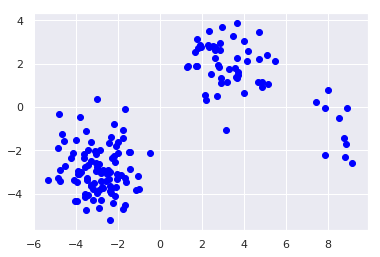

In [4]:
X = np.vstack((np.random.multivariate_normal([-3, -3], [[1, 0], [0, 1]], 100),
               np.random.multivariate_normal([3, 2], [[1, 0], [0, 1]], 50),
               np.random.multivariate_normal([8, -1], [[1, 0], [0, 1]], 10)))
np.random.shuffle(X)

plt.figure()
plt.plot(X[:, 0], X[:, 1], 'o', color='blue')

We can clearly see the three clusters in the data. Let's call them: cluster 1, 2, and 3 for respectively the cluster with 100, 50, and 10 instances.

# Detect outliers

## iNNe

In [3]:
from anomatools.anomaly_detection import iNNe

In [4]:
# construct detector and find outliers
detector = iNNe(t=200, n=12)
y_score, y_pred = detector.fit_predict(X, None)

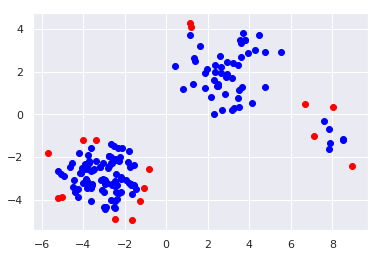

In [5]:
plt.figure()
for l in [-1, 1]:
    ix = np.where(y_pred == l)[0]
    c = 'red' if l == 1 else 'blue'
    plt.plot(X[ix, 0], X[ix, 1], 'o', color=c)

## kNNo

In [6]:
from anomatools.anomaly_detection import kNNo

In [7]:
# construct detector and find outliers
detector = kNNo(k=10)
y_score, y_pred = detector.fit_predict(X, None)

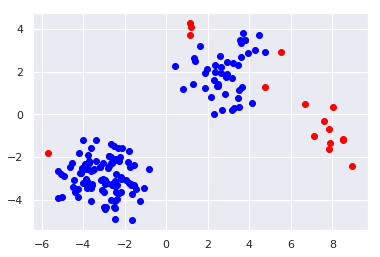

In [8]:
plt.figure()
for l in [-1, 1]:
    ix = np.where(y_pred == l)[0]
    c = 'red' if l == 1 else 'blue'
    plt.plot(X[ix, 0], X[ix, 1], 'o', color=c)

## LOF as the base classifier for SSDO

In [3]:
from anomatools.anomaly_detection import SSDO

In [16]:
# construct detector and find outliers
detector = SSDO(alpha=2.3, k=16, base_classifier='LOF', contamination=0.1, base_classifier_parameters={'n_neighbors': 6, 'contamination': 0.1})
y_score, y_pred = detector.fit_predict(X, None)

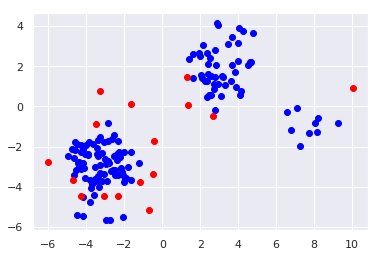

In [17]:
plt.figure()
for l in [-1, 1]:
    ix = np.where(y_pred == l)[0]
    c = 'red' if l == 1 else 'blue'
    plt.plot(X[ix, 0], X[ix, 1], 'o', color=c)